# pandas 심화
`작성자: 최원칠 강사`   
`traveler4d@gmail.com`


### 주요 내용

1. 연속형과 비연속형
2. 문자열과 날짜형
3. 반복적 기능 적용
<br>

### 목표 
1. 데이터의 형태를 파악하여 연속형과 비연속형을 자유롭게 사용할 수 있다.
2. 문자열, 날짜형 등의 특수형들을 잘 활용할 수 있다.
3. 다양한 기능,통계 들을 전체 데이터에 반복적으로 적용할 수 있다.

<br>
<hr>
<br>

---
## 1. 연속형과 비연속형
상황에 따라 연속형특징을 가지는 타입의 데이터와 비연속형 특징을 가지는 데이터의 활용형태가 다릅니다.  
pandas에서 제공하는 다양한 스킬을 활용하여 연속형과 비연속형 데이터를 좀더 다채롭게 다룰 수 있습니다.

### 1.1 연속형 변수의 이산, 범주화
> `cut()`: 값을 이산 간격으로 분류(등간격)   
`qcut()`: 분위수 기반 이산화(등비율)  

In [1]:
import pandas as pd
df_cm = pd.read_csv('data/Churn_Modeling.csv')
df_cm = df_cm.set_index('CustomerId').iloc[:,1:8]
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance
CustomerId,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00
15647311,Hill,608,Spain,Female,41,1,83807.86
15619304,Onio,502,France,Female,42,8,159660.80
15701354,Boni,699,France,Female,39,1,0.00
15737888,Mitchell,850,Spain,Female,43,2,125510.82


In [2]:
# 연령대 변수 생성
    ## //: 몫 계산
    ## %: 나머지 계산
df_cm['age_grp'] = (df_cm['Age'] // 10).astype('category')
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,age_grp
CustomerId,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,4
15647311,Hill,608,Spain,Female,41,1,83807.86,4
15619304,Onio,502,France,Female,42,8,159660.80,4
15701354,Boni,699,France,Female,39,1,0.00,3
15737888,Mitchell,850,Spain,Female,43,2,125510.82,4


In [3]:
df_cm.dtypes

Surname          object
CreditScore       int64
Geography        object
Gender           object
Age               int64
Tenure            int64
Balance         float64
age_grp        category
dtype: object

#### *cut()* 을 활용한 연속형 데이터를 등간격으로 구간화

In [4]:
# 등간격으로 구간화하기
df_cm['age_gen'] = pd.cut(df_cm['Age'], bins=3)
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,age_grp,age_gen
CustomerId,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,4,"(17.926, 42.667]"
15647311,Hill,608,Spain,Female,41,1,83807.86,4,"(17.926, 42.667]"
15619304,Onio,502,France,Female,42,8,159660.80,4,"(17.926, 42.667]"
15701354,Boni,699,France,Female,39,1,0.00,3,"(17.926, 42.667]"
15737888,Mitchell,850,Spain,Female,43,2,125510.82,4,"(42.667, 67.333]"


In [5]:
# 타입은 category 타입으로 생성
df_cm.dtypes

Surname          object
CreditScore       int64
Geography        object
Gender           object
Age               int64
Tenure            int64
Balance         float64
age_grp        category
age_gen        category
dtype: object

In [6]:
# labels 인자 활용
df_cm['age_gen'] = pd.cut(df_cm['Age'], bins=3, labels = ['Y','M','O'])
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,age_grp,age_gen
CustomerId,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,4,Y
15647311,Hill,608,Spain,Female,41,1,83807.86,4,Y
15619304,Onio,502,France,Female,42,8,159660.80,4,Y
15701354,Boni,699,France,Female,39,1,0.00,3,Y
15737888,Mitchell,850,Spain,Female,43,2,125510.82,4,M


In [7]:
cg = [0, 600, 800, 900]
labels = ['nor', 'vip','vvip']

In [8]:
df_cm['CG'] = pd.cut(df_cm['CreditScore'], bins=cg, labels = labels)
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,age_grp,age_gen,CG
CustomerId,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,4,Y,vip
15647311,Hill,608,Spain,Female,41,1,83807.86,4,Y,vip
15619304,Onio,502,France,Female,42,8,159660.80,4,Y,nor
15701354,Boni,699,France,Female,39,1,0.00,3,Y,vip
15737888,Mitchell,850,Spain,Female,43,2,125510.82,4,M,vvip


In [9]:
# 등구간의 관측치 불균형 문제
df_cm['CG'].value_counts()

CG
vip     6289
nor     3066
vvip     645
Name: count, dtype: int64

#### *qcut()* 을 활용한 연속형 데이터의 등비율 구간화

In [10]:
# qcut()을 활용한 등비율 구간화
df_cm['CG'] = pd.qcut(df_cm['CreditScore'], q=3, labels=labels)
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,age_grp,age_gen,CG
CustomerId,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,4,Y,vip
15647311,Hill,608,Spain,Female,41,1,83807.86,4,Y,nor
15619304,Onio,502,France,Female,42,8,159660.80,4,Y,nor
15701354,Boni,699,France,Female,39,1,0.00,3,Y,vvip
15737888,Mitchell,850,Spain,Female,43,2,125510.82,4,M,vvip


In [11]:
df_cm['CG'].value_counts()

CG
nor     3363
vip     3334
vvip    3303
Name: count, dtype: int64

### 1.2 비연속형 데이터의 변환

> `factorize()`: 비연속 데이터를 수치화(순서 인코딩)    
`get_dummies()`: 비연속 데이터를 더미 변수로 생성

#### *factorize()* 을 활용한 비연속형 데이터를 카테고리의 인덱스값으로 인코딩

In [12]:
import pandas as pd
df_cm = pd.read_csv('data/Churn_Modeling.csv')
df_cm = df_cm.set_index('CustomerId').iloc[:,1:8]
df_cm.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance
CustomerId,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00
15647311,Hill,608,Spain,Female,41,1,83807.86
15619304,Onio,502,France,Female,42,8,159660.80
15701354,Boni,699,France,Female,39,1,0.00
15737888,Mitchell,850,Spain,Female,43,2,125510.82


In [13]:
# factorize()는 (인코딩값, 인덱스목록)의 튜플을 반환
enc, index = pd.factorize(df_cm['Geography'])
print(enc)
print(index)

[0 1 0 ... 0 2 0]
Index(['France', 'Spain', 'Germany'], dtype='object')


In [14]:
df_cm['geo_ind'] = pd.factorize(df_cm['Geography'])[0]
df_cm

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,geo_ind
CustomerId,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,0
15647311,Hill,608,Spain,Female,41,1,83807.86,1
15619304,Onio,502,France,Female,42,8,159660.80,0
15701354,Boni,699,France,Female,39,1,0.00,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1
...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,0
15569892,Johnstone,516,France,Male,35,10,57369.61,0
15584532,Liu,709,France,Female,36,7,0.00,0


In [15]:
# 결과 데이터 타입은 int64
df_cm.dtypes

Surname         object
CreditScore      int64
Geography       object
Gender          object
Age              int64
Tenure           int64
Balance        float64
geo_ind          int64
dtype: object

#### *get_dummies()* 을 활용한 비연속형 데이터를 0과 1로 표기하는 더미데이터 생성(원-핫 인코딩)

In [16]:
# get_dummies()는 해당 관측치의 데이터에 해당하는 컬럼만 1로 표기
geo_dum = pd.get_dummies(df_cm['Geography'])
geo_dum

,France,Germany,Spain
CustomerId,,,
15634602,True,False,False
15647311,False,False,True
15619304,True,False,False
15701354,True,False,False
15737888,False,False,True
...,...,...,...
15606229,True,False,False
15569892,True,False,False
15584532,True,False,False


In [17]:
# concat또는 merge(join)로 결합
pd.concat([df_cm,geo_dum], axis = 1)
df_cm.join(geo_dum, how='left')

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,geo_ind,France,Germany,Spain
CustomerId,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,0,True,False,False
15647311,Hill,608,Spain,Female,41,1,83807.86,1,False,False,True
15619304,Onio,502,France,Female,42,8,159660.80,0,True,False,False
15701354,Boni,699,France,Female,39,1,0.00,0,True,False,False
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,0,True,False,False
15569892,Johnstone,516,France,Male,35,10,57369.61,0,True,False,False
15584532,Liu,709,France,Female,36,7,0.00,0,True,False,False


---
## 실습 해보기

#### [실습 1-1]

1. math score의 값을 등간격으로 '상','중','하' 범주을 나타대내는 math level컬럼 생성
2. math score의 값을 등비율로 '상','중','하' 범주을 나타대내는 math level컬럼 생성
3. math score의 값이 90이상이면 '상', 75이상이면 '중', 75미만이면 '하'로 나타내는 math level컬럼 생성
4. race/ethnicity의 범주값을 인덱스의 값으로 인코딩하여 나타내는 race enc컬럼 생성
5. race/ethnicity의 범주값을 더미데이터로 나타내는 데이터프레임 출력

In [18]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


---
## 2. 문자열과 날짜형
테이블데이터에는 문자열(str) 또는 날짜형(datetime) 타입의 데이터가 포함되는 경우가 많이 있습니다.   
pandas는 문자열과 날짜형에 대한 다양한 분석 스킬 기능을 제공하기에 이를 활용하면 좀더 고차원적인 분석이 가능해집니다.


### 2.1 문자열 다루기(str)
문자열 시리즈에서 .str 접근자를 활용하면 문자열을 제어하는 다양한 함수 사용가능
> `str.contains()` :   
`str.strip()` :   
`str.replace()` :   
`str.split()` :   
`str.contains()` :   

In [2]:
import pandas as pd 
df_az = pd.read_csv('./data/amazon.csv')[['product_id','product_name','category','discount_percentage','rating']].set_index('product_id')
df_az.head()

,product_name,category,discount_percentage,rating
product_id,,,,
B07JW9H4J1,\tWayona Nylon Braided USB to Lightning Fast C...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2
B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43%,4.0
B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,90%,3.9
B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,53%,4.2
B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,61%,4.2


In [3]:
df_az['category'] == ''

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [4]:
df_az['category'].str.contains('Cables')

product_id
B07JW9H4J1     True
B098NS6PVG     True
B096MSW6CT     True
B08HDJ86NZ     True
B08CF3B7N1     True
              ...  
B08L7J3T31    False
B01M6453MB    False
B009P2LIL4    False
B00J5DYCCA    False
B01486F4G6    False
Name: category, Length: 1465, dtype: bool

In [5]:
df_az[df_az['category'].str.contains('Cables')]

,product_name,category,discount_percentage,rating
product_id,,,,
B07JW9H4J1,\tWayona Nylon Braided USB to Lightning Fast C...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2
B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43%,4.0
B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,90%,3.9
B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,53%,4.2
B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,61%,4.2
...,...,...,...,...
B09CMP1SC8,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,Computers&Accessories|Accessories&Peripherals|...,60%,4.1
B09YLXYP7Y,Ambrane 60W / 3A Fast Charging Output Cable wi...,Computers&Accessories|Accessories&Peripherals|...,55%,4.0
B0B2DJDCPX,SWAPKART Fast Charging Cable and Data Sync USB...,Computers&Accessories|Accessories&Peripherals|...,58%,3.9


In [21]:
df_az['product_name'].str.lower()

product_id
B07JW9H4J1    \twayona nylon braided usb to lightning fast c...
B098NS6PVG    ambrane unbreakable 60w / 3a fast charging 1.5...
B096MSW6CT    sounce fast phone charging cable & data sync u...
B08HDJ86NZ    boat deuce usb 300 2 in 1 type-c & micro usb s...
B08CF3B7N1    portronics konnect l 1.2m fast charging 3a 8 p...
                                    ...                        
B08L7J3T31    noir aqua - 5pcs pp spun filter + 1 spanner | ...
B01M6453MB    prestige delight prwo electric rice cooker (1 ...
B009P2LIL4    bajaj majesty rx10 2000 watts heat convector r...
B00J5DYCCA    havells ventil air dsp 230mm exhaust fan (pist...
B01486F4G6    borosil jumbo 1000-watt grill sandwich maker (...
Name: product_name, Length: 1465, dtype: object

In [22]:
df_az['product_name'].str.strip()

product_id
B07JW9H4J1    Wayona Nylon Braided USB to Lightning Fast Cha...
B098NS6PVG    Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
B096MSW6CT    Sounce Fast Phone Charging Cable & Data Sync U...
B08HDJ86NZ    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
B08CF3B7N1    Portronics Konnect L 1.2M Fast Charging 3A 8 P...
                                    ...                        
B08L7J3T31    Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
B01M6453MB    Prestige Delight PRWO Electric Rice Cooker (1 ...
B009P2LIL4    Bajaj Majesty RX10 2000 Watts Heat Convector R...
B00J5DYCCA    Havells Ventil Air DSP 230mm Exhaust Fan (Pist...
B01486F4G6    Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
Name: product_name, Length: 1465, dtype: object

In [23]:
df_az['product_name'] = df_az['product_name'].str.lower().str.strip()
df_az.head()

,product_name,category,discount_percentage,rating
product_id,,,,
B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2
B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43%,4.0
B096MSW6CT,sounce fast phone charging cable & data sync u...,Computers&Accessories|Accessories&Peripherals|...,90%,3.9
B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,Computers&Accessories|Accessories&Peripherals|...,53%,4.2
B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,Computers&Accessories|Accessories&Peripherals|...,61%,4.2


In [24]:
df_az['discount_percentage'].str.replace('%','')

product_id
B07JW9H4J1    64
B098NS6PVG    43
B096MSW6CT    90
B08HDJ86NZ    53
B08CF3B7N1    61
              ..
B08L7J3T31    59
B01M6453MB    25
B009P2LIL4    28
B00J5DYCCA    26
B01486F4G6    22
Name: discount_percentage, Length: 1465, dtype: object

In [25]:
df_az['discount'] = df_az['discount_percentage'].str.replace('%','').astype('int64') / 100
df_az.head()

,product_name,category,discount_percentage,rating,discount
product_id,,,,,
B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64
B098NS6PVG,ambrane unbreakable 60w / 3a fast charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,43%,4.0,0.43
B096MSW6CT,sounce fast phone charging cable & data sync u...,Computers&Accessories|Accessories&Peripherals|...,90%,3.9,0.90
B08HDJ86NZ,boat deuce usb 300 2 in 1 type-c & micro usb s...,Computers&Accessories|Accessories&Peripherals|...,53%,4.2,0.53
B08CF3B7N1,portronics konnect l 1.2m fast charging 3a 8 p...,Computers&Accessories|Accessories&Peripherals|...,61%,4.2,0.61


In [26]:
df_az['category'].str.split('|')

product_id
B07JW9H4J1    [Computers&Accessories, Accessories&Peripheral...
B098NS6PVG    [Computers&Accessories, Accessories&Peripheral...
B096MSW6CT    [Computers&Accessories, Accessories&Peripheral...
B08HDJ86NZ    [Computers&Accessories, Accessories&Peripheral...
B08CF3B7N1    [Computers&Accessories, Accessories&Peripheral...
                                    ...                        
B08L7J3T31    [Home&Kitchen, Kitchen&HomeAppliances, WaterPu...
B01M6453MB    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
B009P2LIL4    [Home&Kitchen, Heating,Cooling&AirQuality, Roo...
B00J5DYCCA    [Home&Kitchen, Heating,Cooling&AirQuality, Fan...
B01486F4G6    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
Name: category, Length: 1465, dtype: object

In [27]:
df_az['category'].str.split('|').str[0]

product_id
B07JW9H4J1    Computers&Accessories
B098NS6PVG    Computers&Accessories
B096MSW6CT    Computers&Accessories
B08HDJ86NZ    Computers&Accessories
B08CF3B7N1    Computers&Accessories
                      ...          
B08L7J3T31             Home&Kitchen
B01M6453MB             Home&Kitchen
B009P2LIL4             Home&Kitchen
B00J5DYCCA             Home&Kitchen
B01486F4G6             Home&Kitchen
Name: category, Length: 1465, dtype: object

In [28]:
df_az['category'].str.split('|', expand=True)

,0,1,2,3,4,5,6
product_id,,,,,,,
B07JW9H4J1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
B098NS6PVG,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
B096MSW6CT,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
B08HDJ86NZ,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
B08CF3B7N1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
B08L7J3T31,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
B01M6453MB,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
B009P2LIL4,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None


In [29]:
cate = df_az['category'].str.split('|', expand=True).stack()
cate.unique()

array(['Computers&Accessories', 'Accessories&Peripherals',
       'Cables&Accessories', 'Cables', 'USBCables', 'NetworkingDevices',
       'NetworkAdapters', 'WirelessUSBAdapters', 'Electronics',
       'HomeTheater,TV&Video', 'Accessories', 'HDMICables', 'Televisions',
       'SmartTelevisions', 'RemoteControls', 'StandardTelevisions',
       'TVMounts,Stands&Turntables', 'TVWall&CeilingMounts', 'RCACables',
       'HomeAudio', 'SpeakerAccessories', 'Mounts', 'OpticalCables',
       'Projectors', 'Adapters', 'SatelliteEquipment',
       'SatelliteReceivers', 'DVICables', 'SpeakerCables',
       'MediaStreamingDevices', 'StreamingClients',
       'AVReceivers&Amplifiers', 'Speakers', 'TowerSpeakers', '3DGlasses',
       'WearableTechnology', 'SmartWatches', 'Mobiles&Accessories',
       'MobileAccessories', 'Chargers', 'PowerBanks',
       'Smartphones&BasicMobiles', 'Smartphones', 'MemoryCards',
       'MicroSD', 'BasicMobiles', 'Headphones,Earbuds&Accessories',
       'Headphones', '

In [30]:
df_ct = cate.reset_index()
df_ct.head()

,product_id,level_1,0
0,B07JW9H4J1,0,Computers&Accessories
1,B07JW9H4J1,1,Accessories&Peripherals
2,B07JW9H4J1,2,Cables&Accessories
3,B07JW9H4J1,3,Cables
4,B07JW9H4J1,4,USBCables


In [31]:
df_mg = pd.merge(df_az, df_ct, how='left',on = 'product_id').rename(columns = {0:'cate'})
df_mg.head()

,product_id,product_name,category,discount_percentage,rating,discount,level_1,cate
0,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64,0,Computers&Accessories
1,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64,1,Accessories&Peripherals
2,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64,2,Cables&Accessories
3,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64,3,Cables
4,B07JW9H4J1,wayona nylon braided usb to lightning fast cha...,Computers&Accessories|Accessories&Peripherals|...,64%,4.2,0.64,4,USBCables


In [32]:
df_gb = df_mg.groupby('cate',as_index=False)['discount'].mean()
df_gb.sort_values('discount',ascending = False).iloc[:10]

,cate,discount
213,PhoneCharms,0.900000
76,Earpads,0.900000
26,CableConnectionProtectors,0.900000
74,DustCovers,0.875000
4,Adapters,0.820000
248,Shower&WallMounts,0.820000
137,InternalHardDrives,0.800000
291,USBtoUSBAdapters,0.785000
264,Stands,0.758182
187,NotebookComputerStands,0.756667



### 2.2 날짜형 다루기(dt)
날짜형 시리즈에서 .dt 접근자를 활용하면 날짜형 데이터를 제어하는 다양한 함수 사용가능
> `date_range()`: 연속적인 날짜를 반환   
`dt.sec~year`: 선택한 날짜(시간) 개념으로 치환  

#### *date_range()* 를 활용하여 연속적인 datetime64 데이터를 가지는 DatetimeIndex 생성

In [33]:
import pandas as pd
df = pd.DataFrame({'CATE' : ['A', 'B', 'C', 'D'],
                   'NUM': [7,6,5,8],
                   'FNUM': [1.5, 2.1, 3.4, 6.2],
                   'BOOL': [True, False, False, True],
                   'DATE' : pd.date_range("2023-01-01 09:10:12", periods=4)})
df

,CATE,NUM,FNUM,BOOL,DATE
0,A,7,1.5,True,2023-01-01 09:10:12
1,B,6,2.1,False,2023-01-02 09:10:12
2,C,5,3.4,False,2023-01-03 09:10:12
3,D,8,6.2,True,2023-01-04 09:10:12


In [34]:
# freq : 날짜간 사이의 기간(D=일, M=월, Y=년)
# periods : 생성될 날짜 개수
# start, end : freq에 따른 start ~ end 사이의 연속적인 날짜 생성

pd.date_range("20230101 09:10:12", periods=4, freq='M')

pd.date_range("20230101 09:10:12", periods=4, freq='Y')

pd.date_range("20230101 09:10:12", periods=4, freq='3M')

pd.date_range("20230101 09:10:12", periods=4, freq='H') # H=시간, T=분, S=초


DatetimeIndex(['2023-01-01 09:10:12', '2023-01-01 10:10:12',
               '2023-01-01 11:10:12', '2023-01-01 12:10:12'],
              dtype='datetime64[ns]', freq='H')

In [35]:
pd.date_range(start='2023-01-01', end='2023-02-01', freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

#### *.dt.시간변수* 를 활용하여 원하는 시간의 데이터를 인덱싱

In [7]:
df_tp = pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20211231.csv').iloc[:,1:8]
df_tp['발생년월일시'] = df_tp['발생년월일시'].astype('datetime64[ns]')
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수
0,2021-01-01 03:00:00,야,금,1,3,0,3
1,2021-01-01 09:00:00,주,금,1,0,0,0
2,2021-01-01 15:00:00,주,금,1,0,0,0
3,2021-01-01 19:00:00,야,금,1,0,0,0
4,2021-01-01 21:00:00,야,금,1,0,0,0
...,...,...,...,...,...,...,...
2811,2021-12-31 16:00:00,주,금,1,0,0,0
2812,2021-12-31 17:00:00,주,금,1,0,0,0
2813,2021-12-31 18:00:00,야,금,1,0,0,0
2814,2021-12-31 19:00:00,야,금,1,0,0,0


In [8]:
df_tp['발생년월일시'].dt.day

0        1
1        1
2        1
3        1
4        1
        ..
2811    31
2812    31
2813    31
2814    31
2815    31
Name: 발생년월일시, Length: 2816, dtype: int32

In [9]:
# day, month, year, weekday, hour, minute, second, date
# weekday: 월~일 => 0~6 

df_tp[df_tp['발생년월일시'].dt.day == 1]
df_tp[df_tp['발생년월일시'].dt.month == 6]
df_tp[df_tp['발생년월일시'].dt.weekday == 0]

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수
17,2021-01-04 00:00:00,야,월,1,0,0,0
18,2021-01-04 07:00:00,주,월,1,1,1,0
19,2021-01-04 10:00:00,주,월,1,0,0,0
20,2021-01-04 16:00:00,주,월,1,1,1,0
21,2021-01-04 17:00:00,주,월,1,0,0,0
...,...,...,...,...,...,...,...
2774,2021-12-27 18:00:00,야,월,1,0,0,0
2775,2021-12-27 20:00:00,야,월,1,0,0,0
2776,2021-12-27 20:00:00,야,월,3,2,0,0
2777,2021-12-27 23:00:00,야,월,1,0,0,0


#### *.dt.strftime()* 를 활용하여 원하는 날짜 포맷의 문자열로 치환   

[치환 표현식](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-behavior)

In [10]:
# 문자열(object) 로 반환됨
df_tp['년/월/일시'] = df_tp['발생년월일시'].dt.strftime("%Y-%m-%d")
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,년/월/일시
0,2021-01-01 03:00:00,야,금,1,3,0,3,2021-01-01
1,2021-01-01 09:00:00,주,금,1,0,0,0,2021-01-01
2,2021-01-01 15:00:00,주,금,1,0,0,0,2021-01-01
3,2021-01-01 19:00:00,야,금,1,0,0,0,2021-01-01
4,2021-01-01 21:00:00,야,금,1,0,0,0,2021-01-01
...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00:00,주,금,1,0,0,0,2021-12-31
2812,2021-12-31 17:00:00,주,금,1,0,0,0,2021-12-31
2813,2021-12-31 18:00:00,야,금,1,0,0,0,2021-12-31
2814,2021-12-31 19:00:00,야,금,1,0,0,0,2021-12-31


In [43]:
df_tp['발생연도'] = df_tp['발생년월일시'].dt.strftime("%Y년")
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,년/월/일시,발생연도
0,2021-01-01 03:00:00,야,금,1,3,0,3,2021/01/01,2021년
1,2021-01-01 09:00:00,주,금,1,0,0,0,2021/01/01,2021년
2,2021-01-01 15:00:00,주,금,1,0,0,0,2021/01/01,2021년
3,2021-01-01 19:00:00,야,금,1,0,0,0,2021/01/01,2021년
4,2021-01-01 21:00:00,야,금,1,0,0,0,2021/01/01,2021년
...,...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00:00,주,금,1,0,0,0,2021/12/31,2021년
2812,2021-12-31 17:00:00,주,금,1,0,0,0,2021/12/31,2021년
2813,2021-12-31 18:00:00,야,금,1,0,0,0,2021/12/31,2021년
2814,2021-12-31 19:00:00,야,금,1,0,0,0,2021/12/31,2021년


---
## 실습 해보기

#### [실습 2-1] 
1. df_nf의 release_year컬럼 값이 2020 이상이고 production_countries컬럼에 KR이 포함되는 데이터만 인덱싱하여 데이터프레임으로 출력
2. df_nf의 genres컬럼에서 '[' 와 ']'를 공백으로 변환하여 genres컬럼을 수정
3. 2번결과에서 genres컬럼의 값을 ','를 기준으로 분할(split)하고 0번에 해당하는 문자열로 genres컬럼을 수정
4. 3번결과에서 genres별 imdb_score의 평균을 막대그래프로 그리기

In [44]:
import pandas as pd
df_nf = pd.read_csv('./data/titles.csv').iloc[:,:12]
df_nf.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7



#### [실습 2-2] 

1. df_w에서 date컬럼을 datetime64로 형변환 후 날짜가 5월에 해당하는 데이터만 인덱싱하여 출력
2. df_w에서 date컬럼을 년도-월 만 표기되는 포맷으로 변환하여 YM컬럼으로 추가
3. 2번 결과에서 YM컬럼의 그룹별 일교차(temp_high-temp_low)의 평균을 구하여 선그래프로 그리기

In [45]:
df_w = pd.read_csv('data/weather.csv')
df_w

,date,temp_high,temp_low,hum,rain
0,2021-01-01,1.6,-9.8,64.0,NaN
1,2021-01-02,-1.4,-8.4,38.5,NaN
2,2021-01-03,-2.0,-9.1,45.0,NaN
3,2021-01-04,0.3,-8.4,51.4,0.0
4,2021-01-05,-2.1,-9.9,52.8,0.0
...,...,...,...,...,...
360,2021-12-27,-3.9,-12.9,60.9,0.0
361,2021-12-28,-0.9,-8.5,73.8,NaN
362,2021-12-29,5.9,-3.8,72.9,0.2
363,2021-12-30,0.2,-6.8,48.5,0.0


<br>
<hr>
<br>

## 3. 기능의 반복적 적용

pandas에서 제공되는 다양한 함수는 데이터에 기본적인 분석 스킬로서 유용하게 사용될수 있습니다.  
하지만, 제공되는 함수만으로 처리하게는 제한적인 부분이 분명 존재합니다.  
제공되는 함수가 아닌 직접적으로 구성한 기능을 DataFrame또는 Series에 반복적 적용하여 더욱 자유로운 분석을 진행합니다.

<br>



### 3.1. for문을 활용한 반복 적용
기본적으로 DataFrame를 for문의 이터러블로 사용시 컬럼라벨이 나오게 됩니다.   
하지만, 다양한 함수나 연산자를 활용하여 원하는 이터러블을 구성하여 for문을 활용할 수 있습니다. 
> `DataFrame` : 컬럼이름  
`.iloc`: 순서에 따른 row 시리즈   
`items()`: (컬럼이름, 해당컬럼 시리즈)   
`iterrows()`: (인덱스, 해당로우 시리즈)


In [12]:
df_cm = pd.read_csv('data/Churn_Modeling.csv').iloc[:5,1:7].set_index('CustomerId')
df_cm

,Surname,CreditScore,Geography,Gender,Age
CustomerId,,,,,
15634602,Hargrave,619,France,Female,42
15647311,Hill,608,Spain,Female,41
15619304,Onio,502,France,Female,42
15701354,Boni,699,France,Female,39
15737888,Mitchell,850,Spain,Female,43


In [47]:
# DataFrame 사용
for i in df_cm:
    print(i)

Surname
CreditScore
Geography
Gender
Age


In [13]:
df_cm

,Surname,CreditScore,Geography,Gender,Age
CustomerId,,,,,
15634602,Hargrave,619,France,Female,42
15647311,Hill,608,Spain,Female,41
15619304,Onio,502,France,Female,42
15701354,Boni,699,France,Female,39
15737888,Mitchell,850,Spain,Female,43


In [16]:
# iloc 사용
for i in df_cm.iloc:
    print(i)

Surname        Hargrave
CreditScore         619
Geography        France
Gender           Female
Age                  42
Name: 15634602, dtype: object
Surname          Hill
CreditScore       608
Geography       Spain
Gender         Female
Age                41
Name: 15647311, dtype: object
Surname          Onio
CreditScore       502
Geography      France
Gender         Female
Age                42
Name: 15619304, dtype: object
Surname          Boni
CreditScore       699
Geography      France
Gender         Female
Age                39
Name: 15701354, dtype: object
Surname        Mitchell
CreditScore         850
Geography         Spain
Gender           Female
Age                  43
Name: 15737888, dtype: object


In [49]:
# items() 사용
for col, ser in df_cm.items():
    print('col: ', col)
    print('ser: ', ser)

col:  Surname
ser:  CustomerId
15634602    Hargrave
15647311        Hill
15619304        Onio
15701354        Boni
15737888    Mitchell
Name: Surname, dtype: object
col:  CreditScore
ser:  CustomerId
15634602    619
15647311    608
15619304    502
15701354    699
15737888    850
Name: CreditScore, dtype: int64
col:  Geography
ser:  CustomerId
15634602    France
15647311     Spain
15619304    France
15701354    France
15737888     Spain
Name: Geography, dtype: object
col:  Gender
ser:  CustomerId
15634602    Female
15647311    Female
15619304    Female
15701354    Female
15737888    Female
Name: Gender, dtype: object
col:  Age
ser:  CustomerId
15634602    42
15647311    41
15619304    42
15701354    39
15737888    43
Name: Age, dtype: int64


In [15]:
df_cm

,Surname,CreditScore,Geography,Gender,Age
CustomerId,,,,,
15634602,Hargrave,619,France,Female,42
15647311,Hill,608,Spain,Female,41
15619304,Onio,502,France,Female,42
15701354,Boni,699,France,Female,39
15737888,Mitchell,850,Spain,Female,43


In [50]:
# iterrows() 사용
for ind, row in df_cm.iterrows():
    print('ind: ', ind)
    print('row: ', row)

ind:  15634602
row:  Surname        Hargrave
CreditScore         619
Geography        France
Gender           Female
Age                  42
Name: 15634602, dtype: object
ind:  15647311
row:  Surname          Hill
CreditScore       608
Geography       Spain
Gender         Female
Age                41
Name: 15647311, dtype: object
ind:  15619304
row:  Surname          Onio
CreditScore       502
Geography      France
Gender         Female
Age                42
Name: 15619304, dtype: object
ind:  15701354
row:  Surname          Boni
CreditScore       699
Geography      France
Gender         Female
Age                39
Name: 15701354, dtype: object
ind:  15737888
row:  Surname        Mitchell
CreditScore         850
Geography         Spain
Gender           Female
Age                  43
Name: 15737888, dtype: object



### 3.2. apply() 함수를 이용한 기능 적용
apply() 함수는 사용자가 구성한 인자와 반환이 있는 함수를 데이터프레임 또는 시리즈의 모든 데이터에 일괄적용 해주는 함수입니다.
> `시리즈`에서는 하나의 데이터를 가정하여 기능정의   
`데이터프레임` 에서는 선택한 축에 대한 시리즈를 가정하여 기능정의   
왠만하면 `시리즈`에서 적용해주는 것을 추천

#### 이름 있는 함수를 apply()에 적용하기

In [51]:
df_cm = pd.read_csv('data/Churn_Modeling.csv').iloc[:,1:7]
df_cm.set_index('CustomerId', inplace=True)
df_cm

,Surname,CreditScore,Geography,Gender,Age
CustomerId,,,,,
15634602,Hargrave,619,France,Female,42
15647311,Hill,608,Spain,Female,41
15619304,Onio,502,France,Female,42
15701354,Boni,699,France,Female,39
15737888,Mitchell,850,Spain,Female,43
...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39
15569892,Johnstone,516,France,Male,35
15584532,Liu,709,France,Female,36


In [52]:
# 인자와 반환값이 있는 사용자 정의 함수
def generation(x):
    if x < 30:
        return 'youth'
    elif x < 50:
        return 'middle'
    else:
        return 'old'

df_cm['Generation'] = df_cm['Age'].apply(generation) # 함수의 이름을 인자로 입력
df_cm

,Surname,CreditScore,Geography,Gender,Age,Generation
CustomerId,,,,,,
15634602,Hargrave,619,France,Female,42,middle
15647311,Hill,608,Spain,Female,41,middle
15619304,Onio,502,France,Female,42,middle
15701354,Boni,699,France,Female,39,middle
15737888,Mitchell,850,Spain,Female,43,middle
...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,middle
15569892,Johnstone,516,France,Male,35,middle
15584532,Liu,709,France,Female,36,middle


#### 이름 없는 lambda 함수를 apply()에 적용하기

In [53]:
# lambda 인자 : 반환

df_cm['Gender'] = df_cm['Gender'].apply(lambda x : x[0])
df_cm

,Surname,CreditScore,Geography,Gender,Age,Generation
CustomerId,,,,,,
15634602,Hargrave,619,France,F,42,middle
15647311,Hill,608,Spain,F,41,middle
15619304,Onio,502,France,F,42,middle
15701354,Boni,699,France,F,39,middle
15737888,Mitchell,850,Spain,F,43,middle
...,...,...,...,...,...,...
15606229,Obijiaku,771,France,M,39,middle
15569892,Johnstone,516,France,M,35,middle
15584532,Liu,709,France,F,36,middle


In [56]:
df_tp = pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20211231.csv').iloc[:,1:8]
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수
0,2021-01-01 03:00,야,금,1,3,0,3
1,2021-01-01 09:00,주,금,1,0,0,0
2,2021-01-01 15:00,주,금,1,0,0,0
3,2021-01-01 19:00,야,금,1,0,0,0
4,2021-01-01 21:00,야,금,1,0,0,0
...,...,...,...,...,...,...,...
2811,2021-12-31 16:00,주,금,1,0,0,0
2812,2021-12-31 17:00,주,금,1,0,0,0
2813,2021-12-31 18:00,야,금,1,0,0,0
2814,2021-12-31 19:00,야,금,1,0,0,0


In [57]:
df_tp['발생년도'] = df_tp['발생년월일시'].apply(lambda x:x[:4])
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생년도
0,2021-01-01 03:00,야,금,1,3,0,3,2021
1,2021-01-01 09:00,주,금,1,0,0,0,2021
2,2021-01-01 15:00,주,금,1,0,0,0,2021
3,2021-01-01 19:00,야,금,1,0,0,0,2021
4,2021-01-01 21:00,야,금,1,0,0,0,2021
...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00,주,금,1,0,0,0,2021
2812,2021-12-31 17:00,주,금,1,0,0,0,2021
2813,2021-12-31 18:00,야,금,1,0,0,0,2021
2814,2021-12-31 19:00,야,금,1,0,0,0,2021


In [58]:
df_tp['발생월'] = df_tp['발생년월일시'].apply(lambda x:x.split('-')[1])
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생년도,발생월
0,2021-01-01 03:00,야,금,1,3,0,3,2021,01
1,2021-01-01 09:00,주,금,1,0,0,0,2021,01
2,2021-01-01 15:00,주,금,1,0,0,0,2021,01
3,2021-01-01 19:00,야,금,1,0,0,0,2021,01
4,2021-01-01 21:00,야,금,1,0,0,0,2021,01
...,...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00,주,금,1,0,0,0,2021,12
2812,2021-12-31 17:00,주,금,1,0,0,0,2021,12
2813,2021-12-31 18:00,야,금,1,0,0,0,2021,12
2814,2021-12-31 19:00,야,금,1,0,0,0,2021,12


In [60]:
df_tp['월.일'] = df_tp['발생년월일시'].astype('datetime64[ns]').apply(lambda x:x.strftime('%m.%d'))
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생년도,발생월,월.일
0,2021-01-01 03:00,야,금,1,3,0,3,2021,01,01.01
1,2021-01-01 09:00,주,금,1,0,0,0,2021,01,01.01
2,2021-01-01 15:00,주,금,1,0,0,0,2021,01,01.01
3,2021-01-01 19:00,야,금,1,0,0,0,2021,01,01.01
4,2021-01-01 21:00,야,금,1,0,0,0,2021,01,01.01
...,...,...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00,주,금,1,0,0,0,2021,12,12.31
2812,2021-12-31 17:00,주,금,1,0,0,0,2021,12,12.31
2813,2021-12-31 18:00,야,금,1,0,0,0,2021,12,12.31
2814,2021-12-31 19:00,야,금,1,0,0,0,2021,12,12.31


#### 데이터프레임에 apply()에 적용하기

In [19]:
# axis 인자 값에 따라 한번에 가져오는 축이 달라짐
# 해당 축의 데이터를 시리즈로 가져옴
def perdead(x):
    s = x.sum()
    per = x['사망자수']/s*100
    return f'{per:.2f}%'

sc = ['사망자수' ,'부상자수', '중상자수', '경상자수']
df_tp['사망비율'] = df_tp[sc].apply(perdead, axis = 1) # axis = 1: 컬럼축으로 가져옴
df_tp

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,년/월/일시,사망비율
0,2021-01-01 03:00:00,야,금,1,3,0,3,2021-01-01,14.29%
1,2021-01-01 09:00:00,주,금,1,0,0,0,2021-01-01,100.00%
2,2021-01-01 15:00:00,주,금,1,0,0,0,2021-01-01,100.00%
3,2021-01-01 19:00:00,야,금,1,0,0,0,2021-01-01,100.00%
4,2021-01-01 21:00:00,야,금,1,0,0,0,2021-01-01,100.00%
...,...,...,...,...,...,...,...,...,...
2811,2021-12-31 16:00:00,주,금,1,0,0,0,2021-12-31,100.00%
2812,2021-12-31 17:00:00,주,금,1,0,0,0,2021-12-31,100.00%
2813,2021-12-31 18:00:00,야,금,1,0,0,0,2021-12-31,100.00%
2814,2021-12-31 19:00:00,야,금,1,0,0,0,2021-12-31,100.00%


---
## 실습 해보기

#### [실습 3-1]
1. df_w에서 12 ~ 2월을 겨울, 3 ~ 5월을 봄, 6 ~ 8월을 여름, 9 ~ 11월을 가을로 나타내어 season컬럼으로 추가하기(apply 이용)
2. 1번 결과로 부터 계절별 평균 temp_high를 구하여 출력

In [62]:
df_w = pd.read_csv('data/weather.csv')
df_w

,date,temp_high,temp_low,hum,rain
0,2021-01-01,1.6,-9.8,64.0,NaN
1,2021-01-02,-1.4,-8.4,38.5,NaN
2,2021-01-03,-2.0,-9.1,45.0,NaN
3,2021-01-04,0.3,-8.4,51.4,0.0
4,2021-01-05,-2.1,-9.9,52.8,0.0
...,...,...,...,...,...
360,2021-12-27,-3.9,-12.9,60.9,0.0
361,2021-12-28,-0.9,-8.5,73.8,NaN
362,2021-12-29,5.9,-3.8,72.9,0.2
363,2021-12-30,0.2,-6.8,48.5,0.0


#### [실습 3-2] 

1. df_nf에서 imdb_score의 결측치를 0으로 채우고 높은순으로 정렬
2. 1번 결과에서 genres가 drama와 thriller 둘다 포함하고 있는 데이터만 인덱싱(apply 이용)
3. 2번 결과에서 imdb_score가 높은 5개의 title을 x축, imdb_score값을 y축으로 하는 그래프 그리기. 그래프 제목은 top5 drama and thriller

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_nf = pd.read_csv('./data/titles.csv')
df_nf.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## [번외] 외부 통계함수 활용
scipy, numpy, sklearn등 다양한 통계 함수를 제공하는 외부 라이브러리의 함수 또한 apply()에 적용시킬 수 있습니다.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
df_di = pd.read_csv('data/한국환경공단_도로 재비산먼지 측정 정보.csv')
df_di['측정일자'] = df_di['측정일자'].astype('datetime64[ns]')
df_di = df_di[df_di['지역'] == '서울'].groupby('측정일자')[['기온','습도','재비산먼지농도']].mean()
df_di

,기온,습도,재비산먼지농도
측정일자,,,
2022-09-07,28.638889,39.888889,15.500000
2022-09-08,26.574074,58.129630,19.574074
2022-09-14,28.263158,53.842105,9.105263
2022-09-15,28.000000,55.550000,21.750000
2022-09-16,29.250000,63.250000,12.916667
...,...,...,...
2023-02-13,8.424242,62.181818,5.363636
2023-02-15,7.500000,39.000000,95.000000
2023-02-23,5.857143,64.714286,37.285714


### 스케일링 적용하기
스케일링을 통해 수치형 데이터의 범위를 서로 비슷한 수준으로 조정하여 데이터 분석을 좀더 용이하게 할 수 있습니다.

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


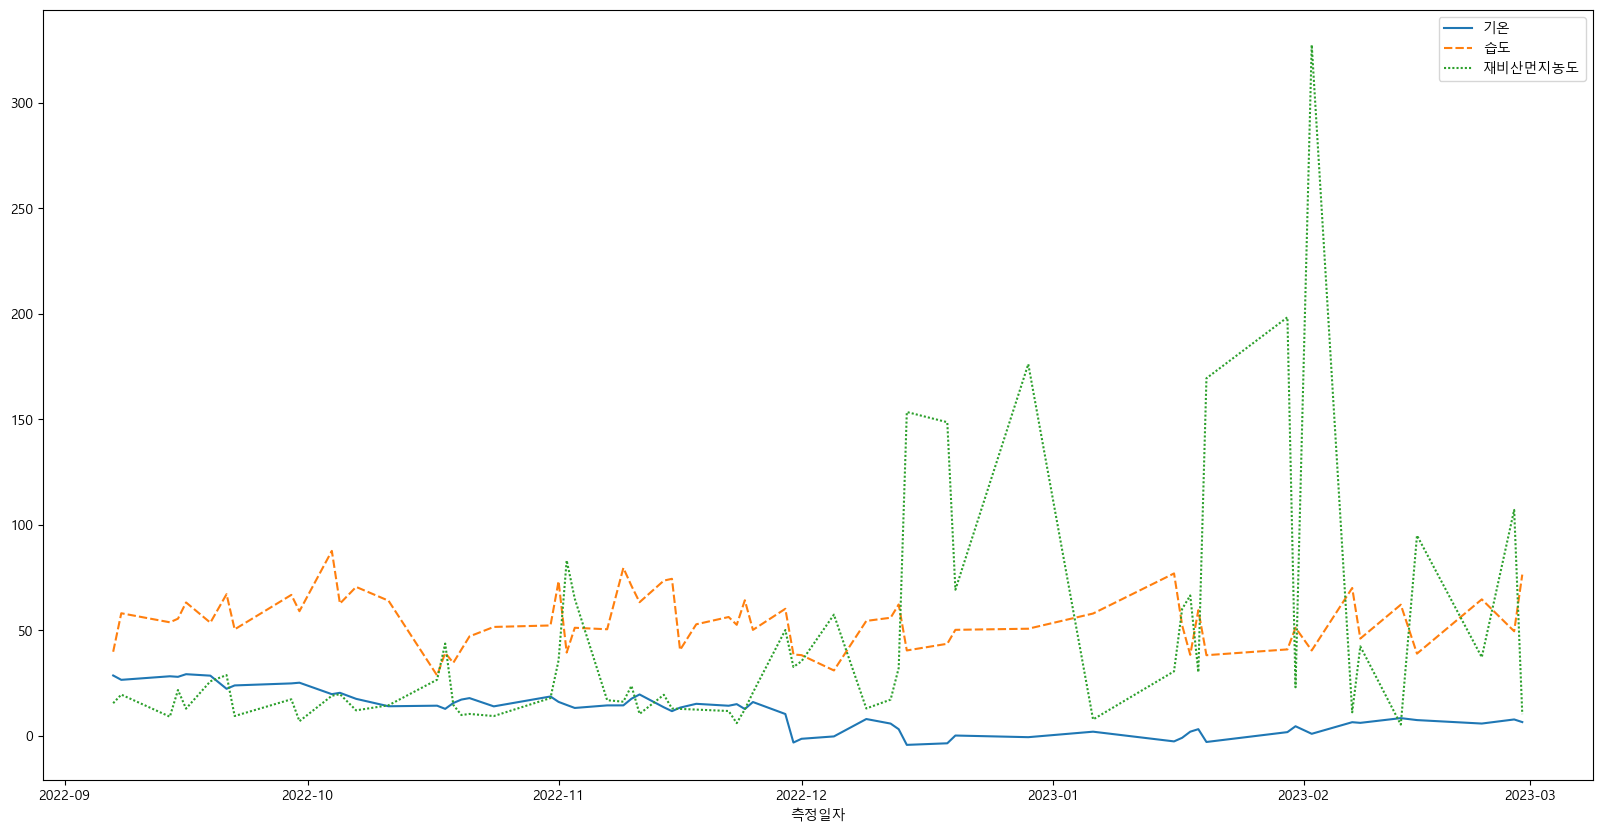

In [65]:
# 숫자의 표현 범위가 서로 다른 3개의 변수
plt.figure(figsize = (20,10))
sns.lineplot(data = df_di)
plt.show()

#### sklearn의 MinMaxScaler모델로 스케일

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


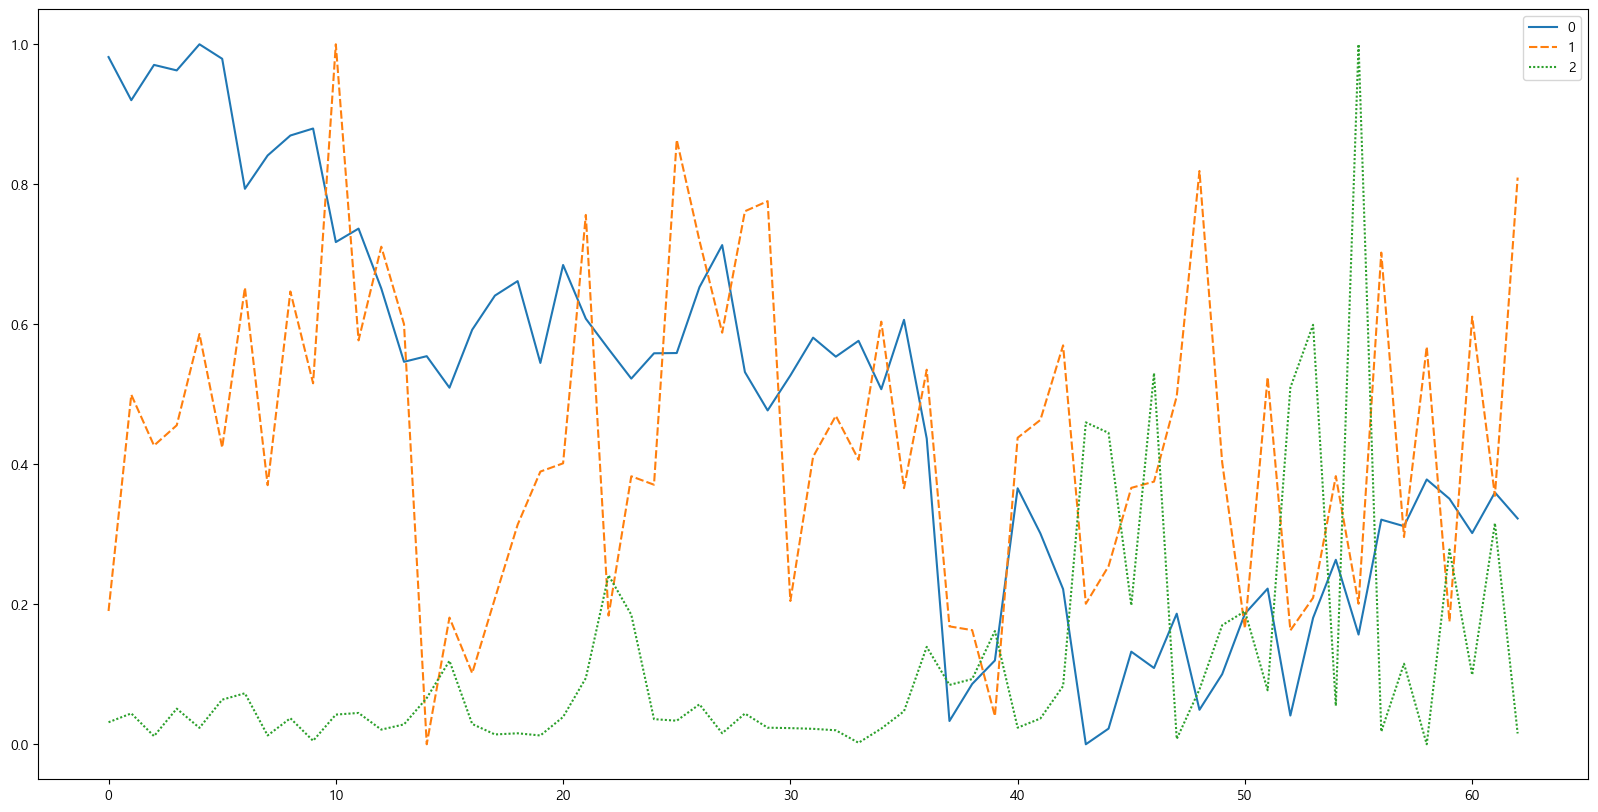

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ns = scaler.fit_transform(df_di)

plt.figure(figsize = (20,10))
sns.lineplot(data = ns)
plt.show()

#### sklearn의 StandardScaler모델로 스케일 (z-score)

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


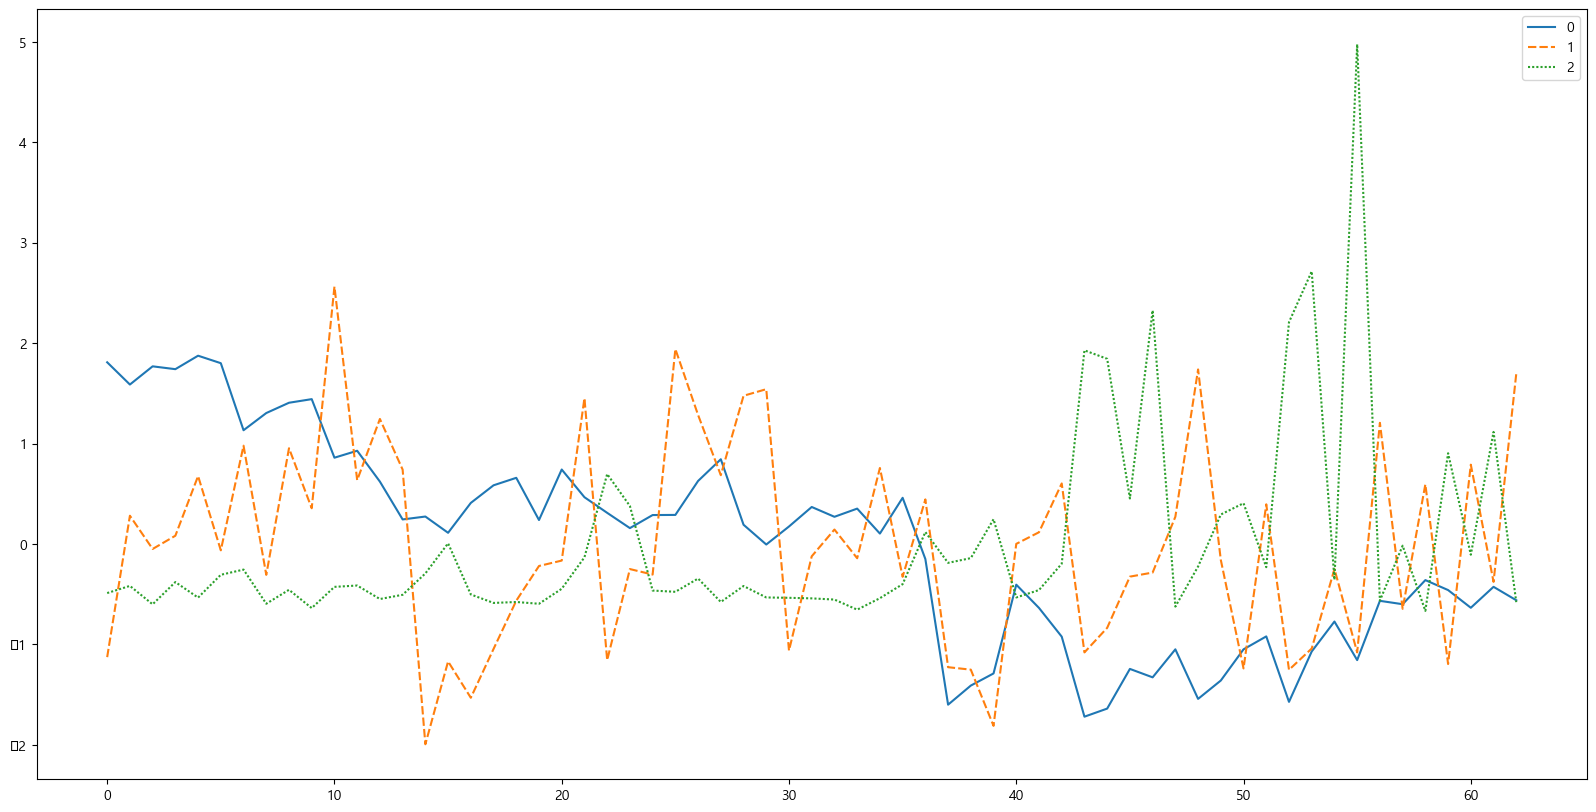

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ns = scaler.fit_transform(df_di)

plt.figure(figsize = (20,10))
sns.lineplot(data = ns)
plt.show()

#### scipy의 zscore함수로 스케일

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


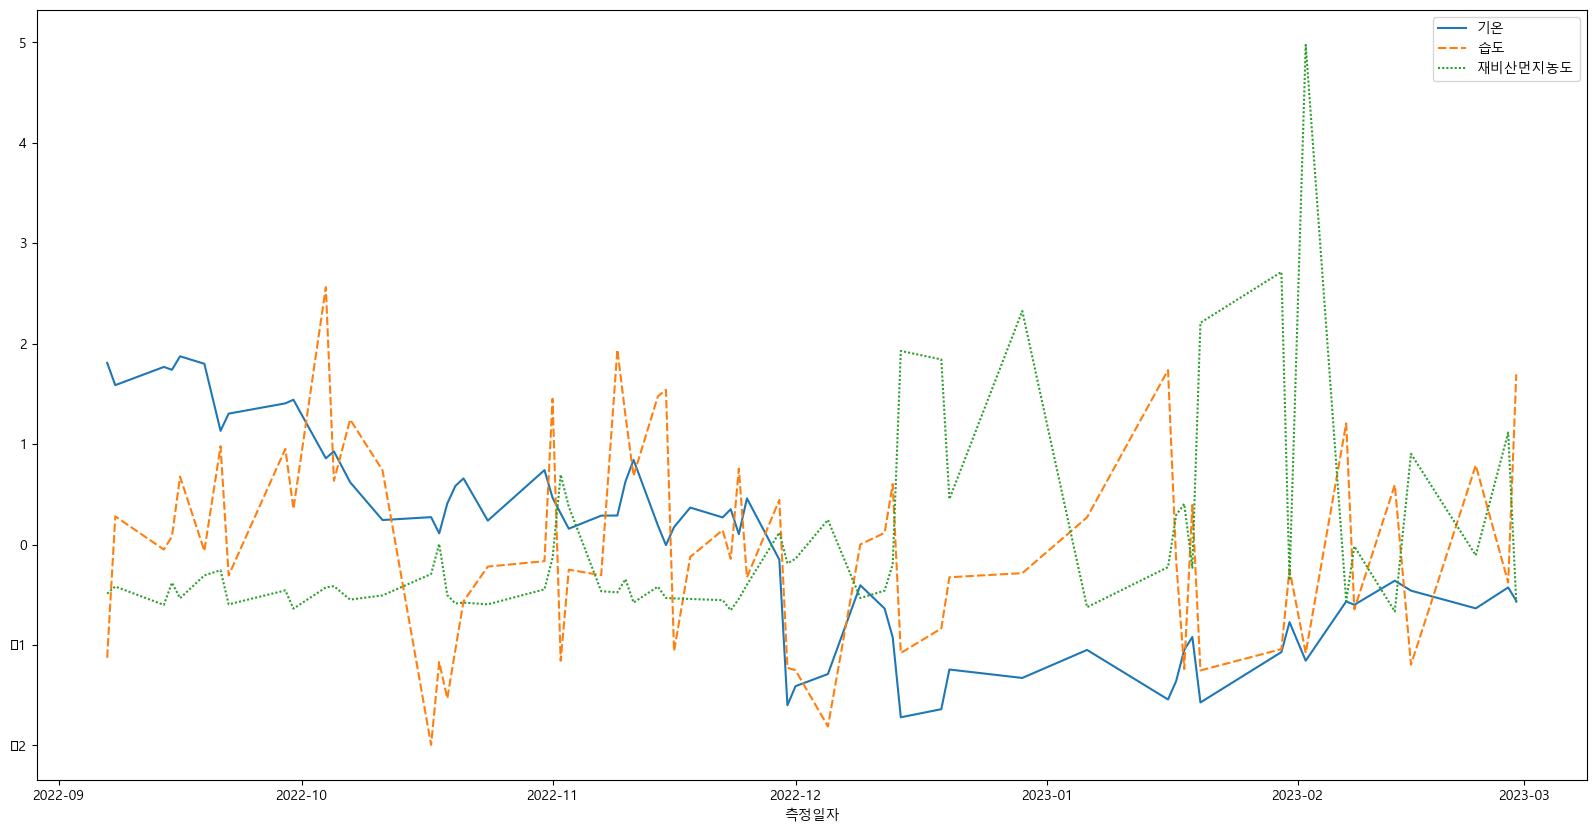

In [68]:
import scipy.stats as ss
ns = df_di.apply(ss.zscore)
plt.figure(figsize = (20,10))
sns.lineplot(data = ns)
plt.show()

### 정규화 적용하기
데이터의 변동폭을 좀더 완만하게 수정, 즉 데이터의 분포를 고르게 하는 작업입니다.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
df_wm = pd.read_excel('data/waterMesntkInfo202310.xlsx',header = 1)
df_wm = df_wm[['수온','pH','용존산소(㎎/L)','총질소(㎎/L)','총인(㎎/L)']].dropna()
df_wm

,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L)
0,17.7,7.1,9.1,3.25,0.052
1,18.7,7.1,9.8,5.65,0.080
2,20.2,7.2,10.3,7.86,0.120
3,18.1,7.0,8.2,3.87,0.075
4,20.3,7.0,9.1,6.20,0.060
...,...,...,...,...,...
3812,21.5,7.0,10.2,8.68,0.165
3813,22.1,7.3,10.8,5.60,0.105
3814,22.0,7.0,7.5,3.24,0.074
3815,21.8,7.1,9.0,7.15,0.105


#### 변동폭이 큰 데이터

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


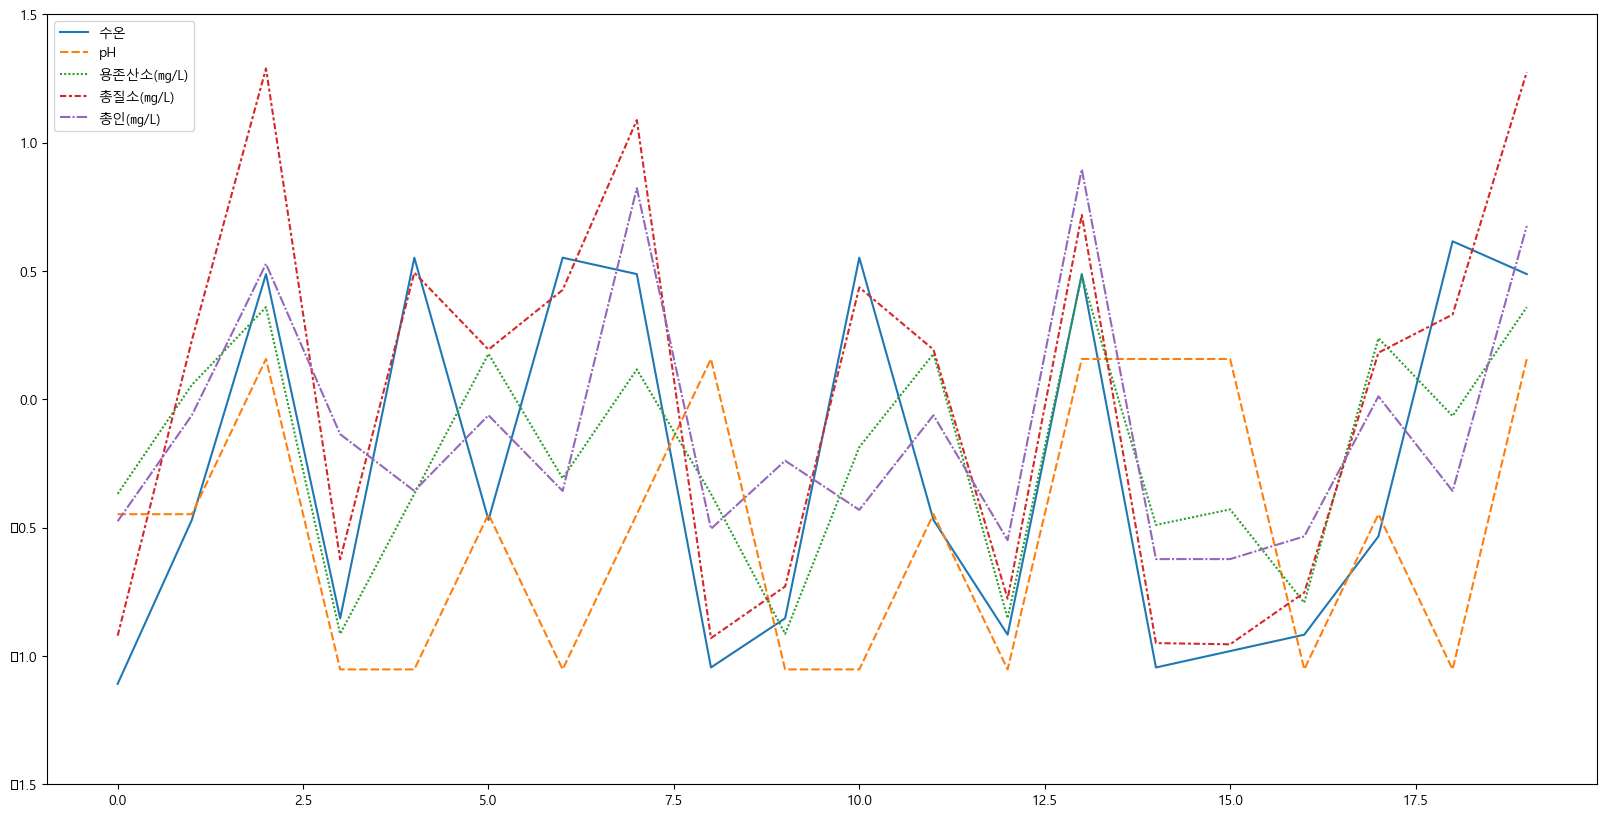

In [70]:
plt.figure(figsize = (20,10))
plt.ylim((-1.5,1.5))
df_zs = df_wm.apply(ss.zscore)
sns.lineplot(data = df_zs.iloc[:20])
plt.show()

#### numpy의 norm함수로 정규화

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

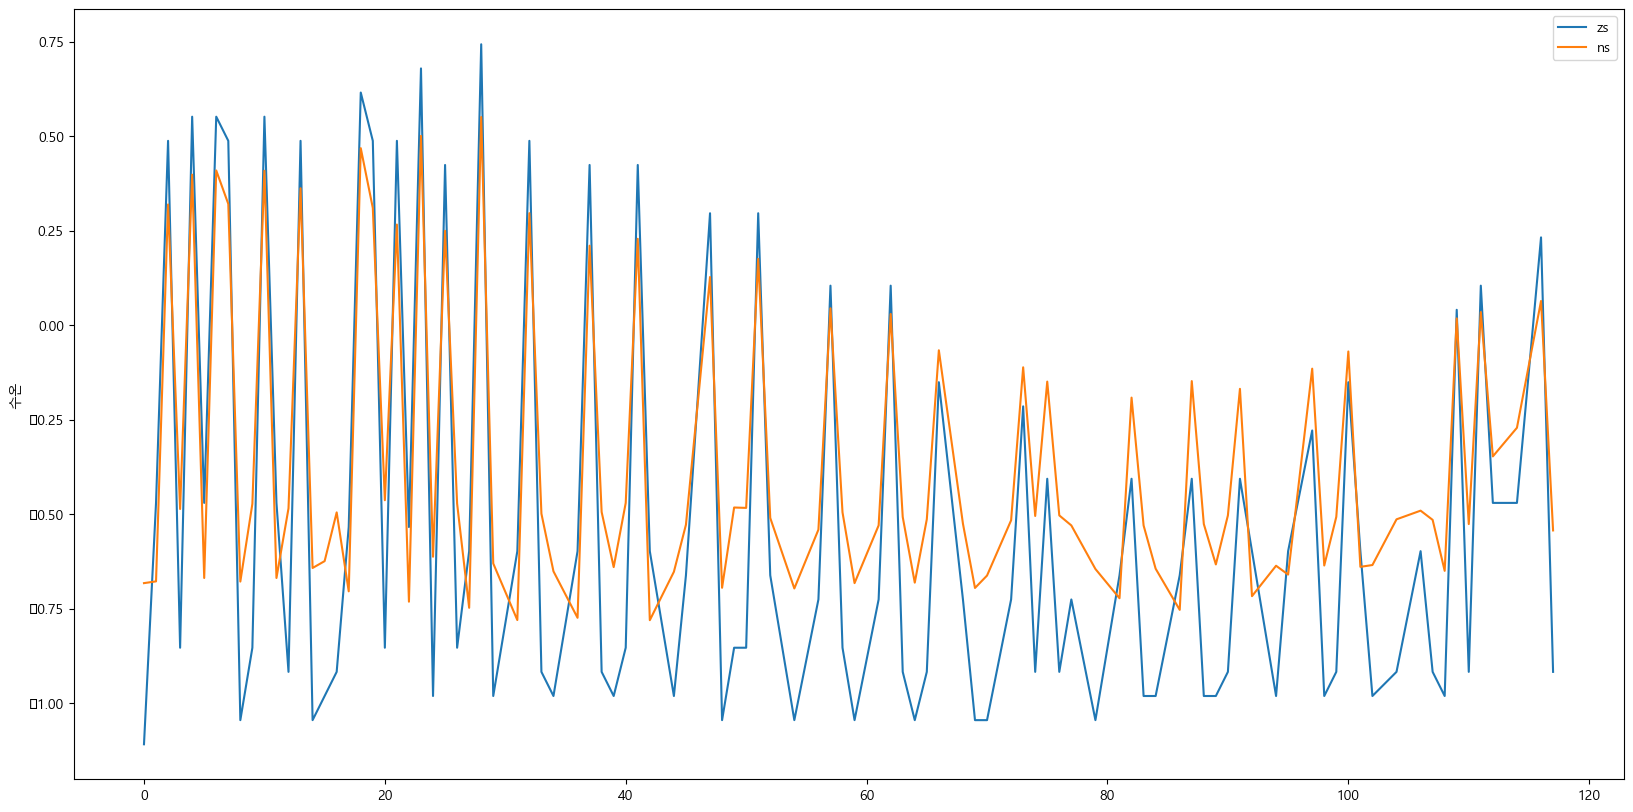

In [71]:
import numpy as np
import scipy.stats as ss
norm = np.linalg.norm(df_zs ,axis = 1)  # 기본 L2 정규화
ns = df_zs.apply(lambda x: x/norm)
plt.figure(figsize = (20,10))
sns.lineplot(data = df_zs.iloc[:100,0], label= 'zs')
sns.lineplot(data = ns.iloc[:100,0], label='ns')
plt.show()

#### sklearn의 Normalizer모듈로 정규화

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

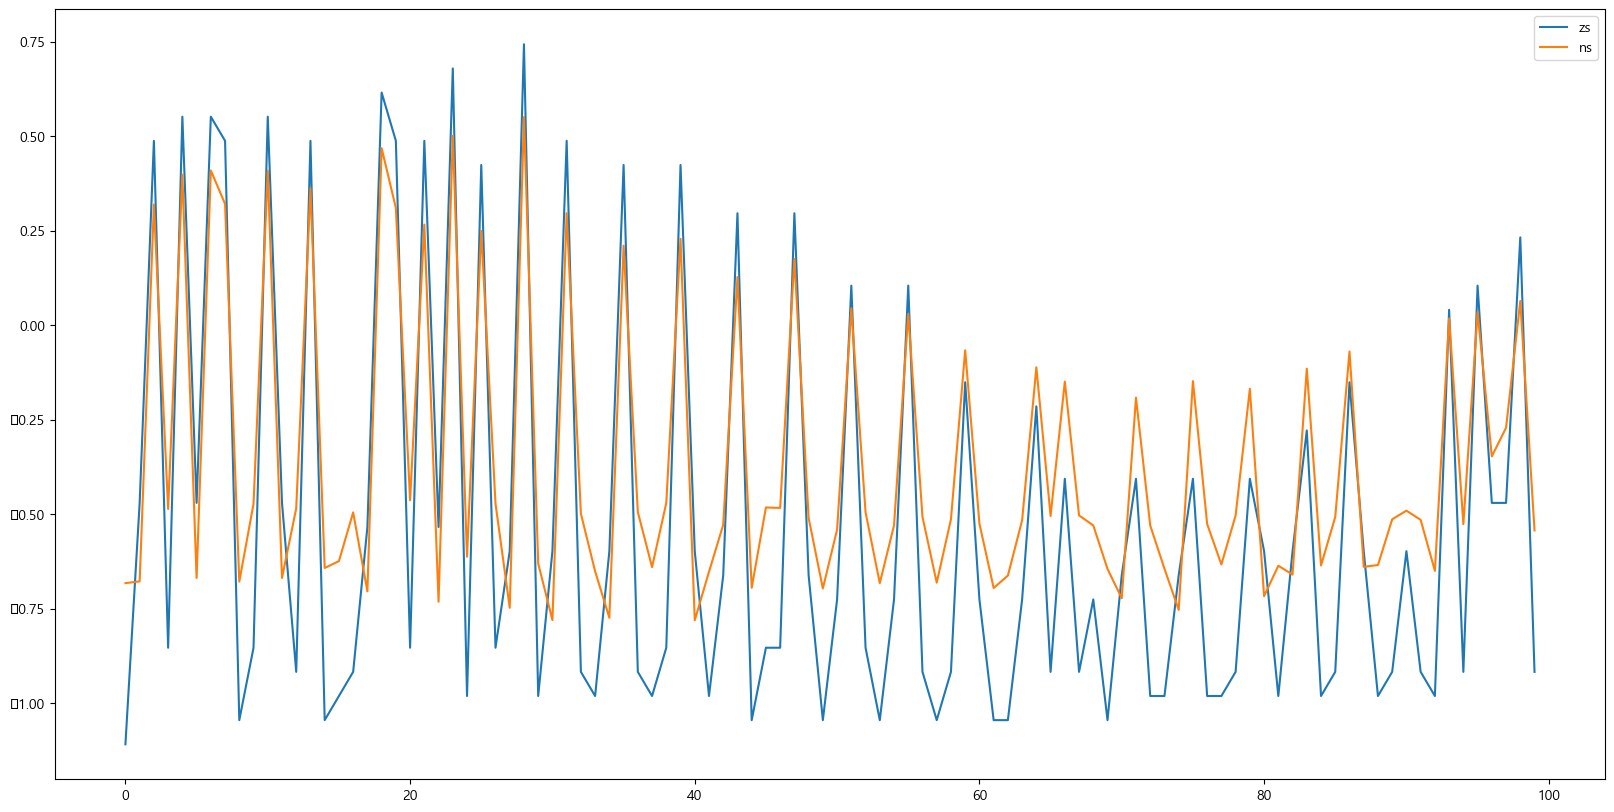

In [72]:
from sklearn.preprocessing import normalize


ns = normalize(df_zs, axis=1, norm='l2')
plt.figure(figsize = (20,10))
sns.lineplot(data = df_zs.to_numpy()[:100,0], label= 'zs')
sns.lineplot(data = ns[:100,0], label='ns')
plt.show()

#### 정규화 데이터 전체 비교해보기

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

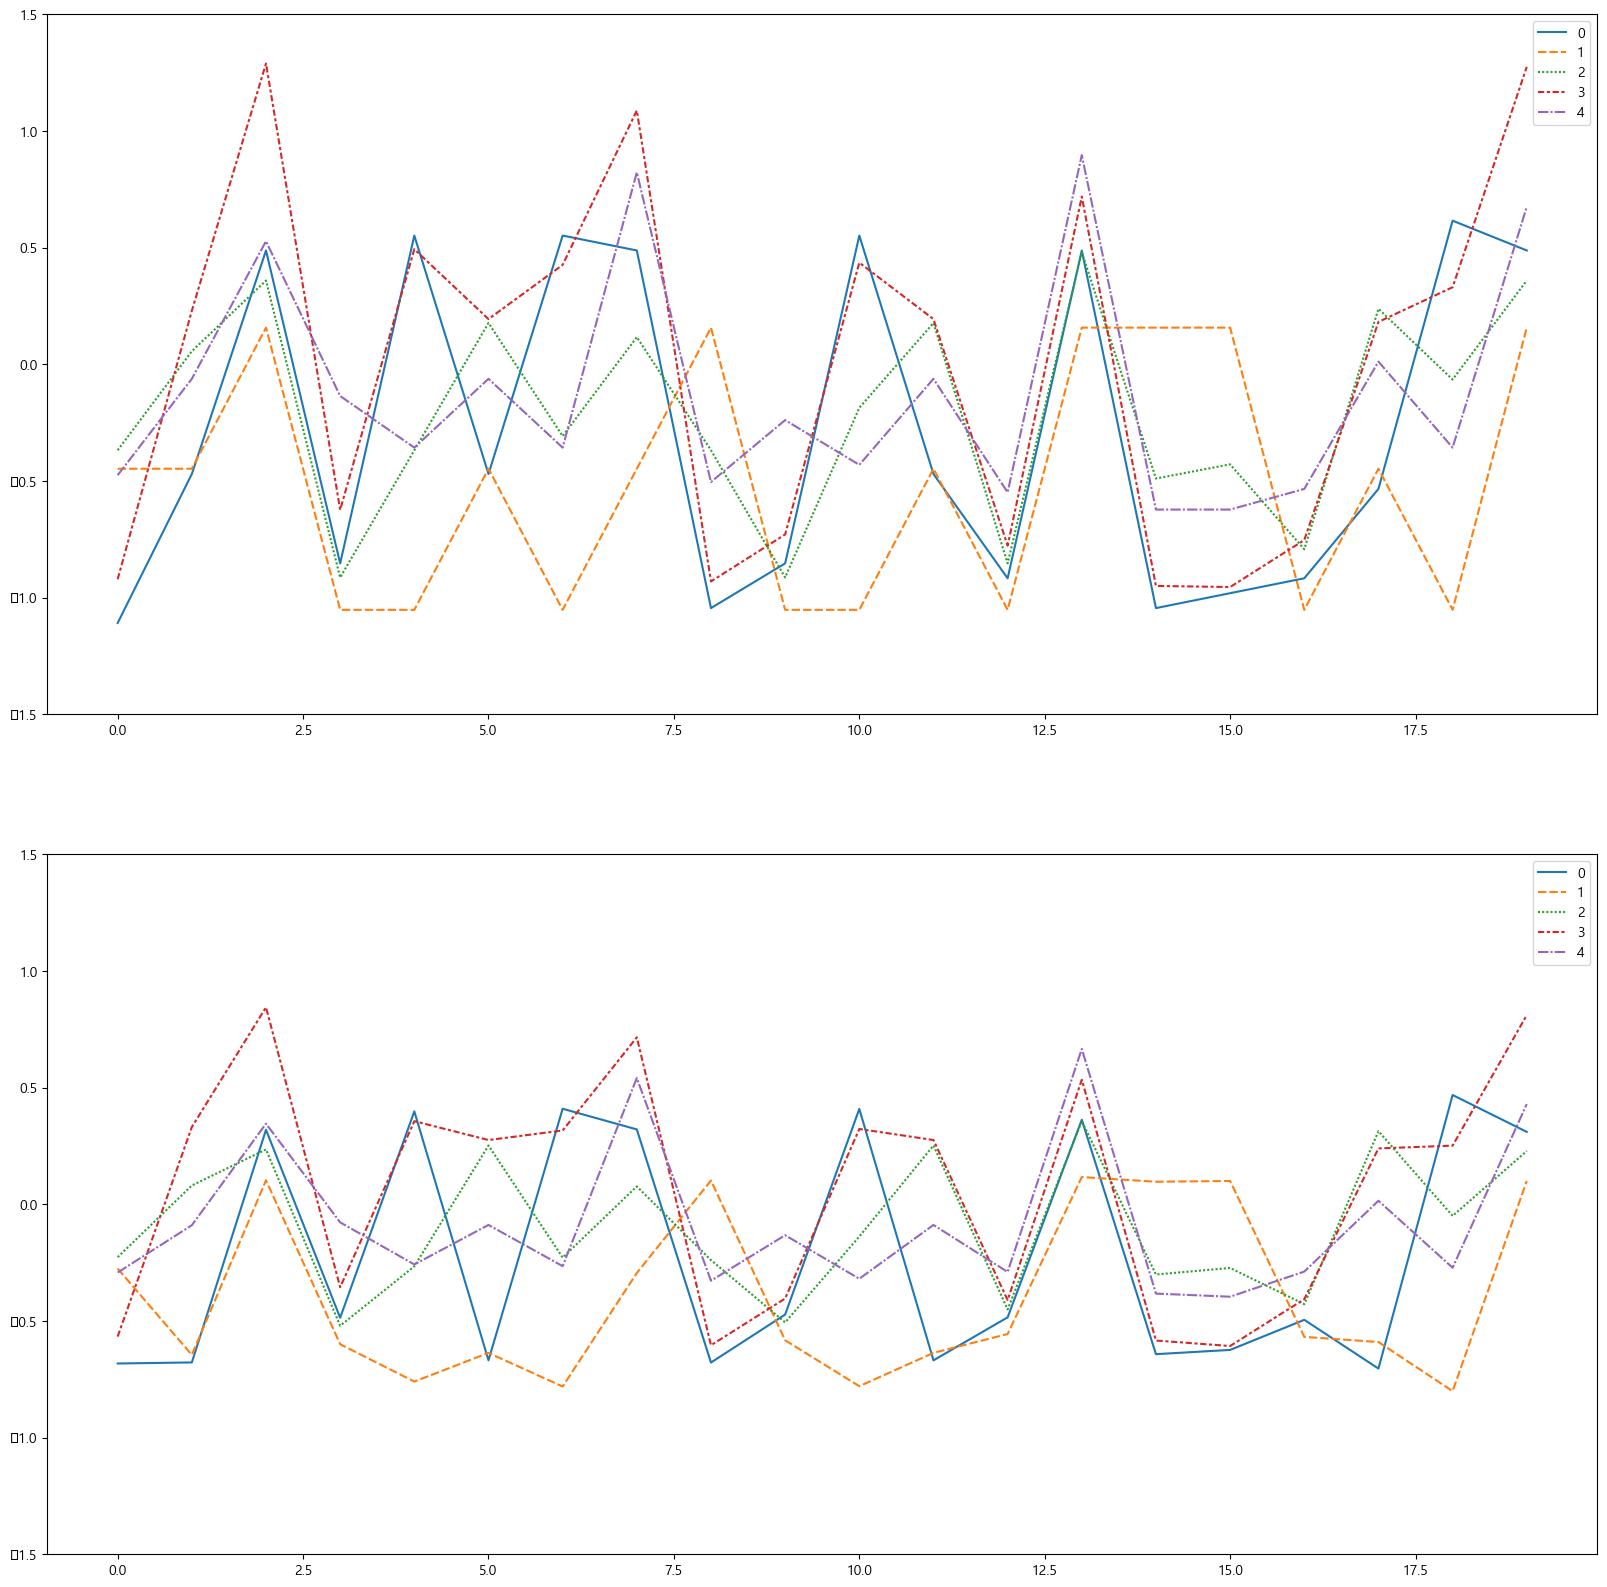

In [73]:
from sklearn.preprocessing import normalize


ns = normalize(df_zs, axis=1, norm='l2')
plt.figure(figsize = (20,20))
ax1 = plt.subplot(2,1,1)
ax1.set_ylim(-1.5, 1.5)
ax2 = plt.subplot(2,1,2)
ax2.set_ylim(-1.5, 1.5)
sns.lineplot(data = df_zs.to_numpy()[:20], ax=ax1)
sns.lineplot(data = ns[:20], ax=ax2)
plt.show()

#### End of script